# KNN and SVM classification of the iris dataset

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import (datasets, neighbors, svm,
                     model_selection, metrics)

# If you want to set a context for your plots using seaborn:
sns.set_context('talk')

# to show the plots
%matplotlib inline

---
## K-Nearest Neighbor (KNN) classifier

KNN is a supervised machine learning algorithm that can be used for classification (data with discerete labels) or regression (data with continous labels). The basic principle behind the KNN classifier is very intituive: for a given point, we find a pre-defined (k) number of training samples that are closest to that point, and predict the label from these.

We'll start off by loading the iris dataset just like last week and re-viewing how you can use seaborn to create a pairplot.

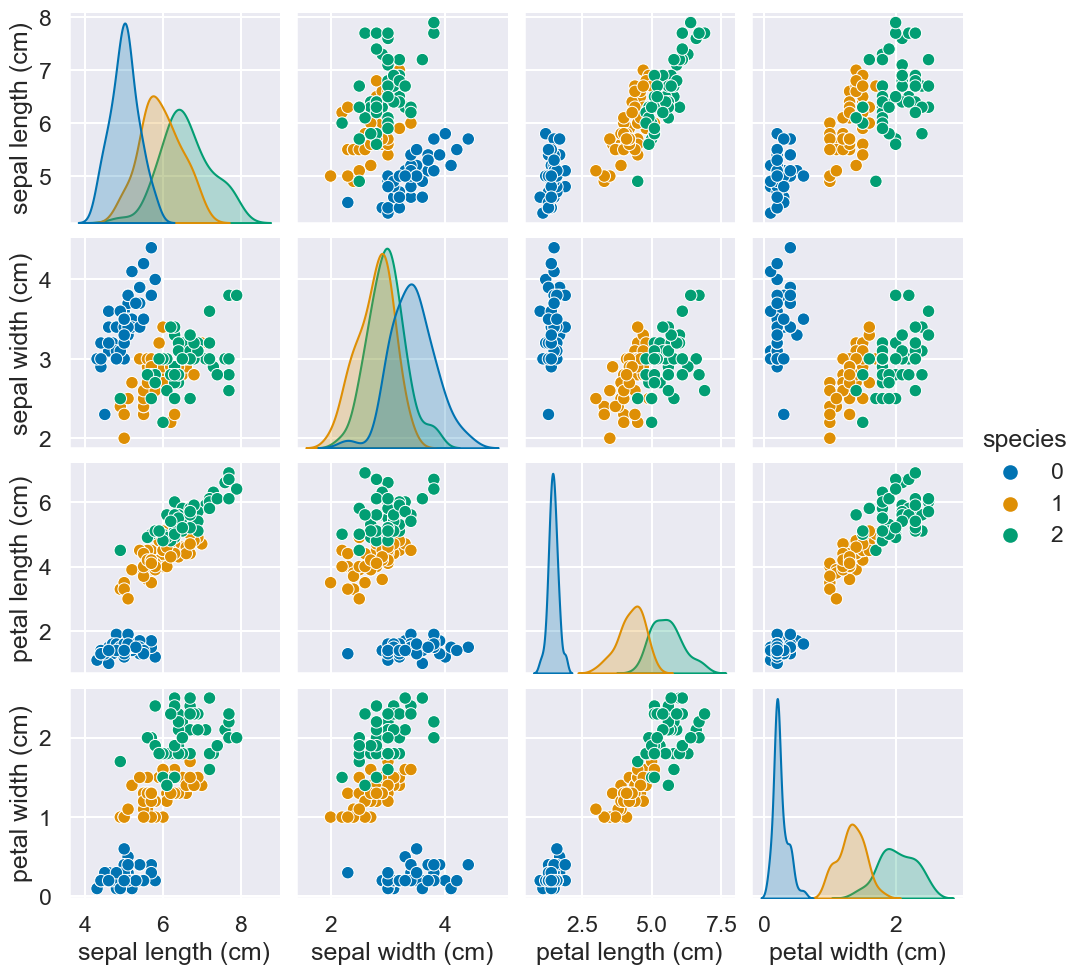

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
cols = [name for name in iris.feature_names]
df.columns = cols
df['species'] = iris.target
g = sns.pairplot(df, vars=cols, hue='species', palette='colorblind')
# species is class we want to predict

--> We see that the blue species clearly seperares from the rest but orange and green are overlapping, thus harder to classify!

---
### Predicting with KNN classifier
We use the KNN classifier *neighbors.KNeighborsClassifier* to predict the flower species by using the two features sepal length and sepal width.


First we, split your data into training and test sets. We make use of the function *model_selection.train_test_split*.

In [3]:
X = df[['sepal length (cm)', 'sepal width (cm)']]
y = df['species']

# apply split and convert to numpy arrays
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.2)
y_train = np.array(y_train)
y_test = np.array(y_test)

Next, we create a predictor object with 5 as number of neighbours and fit the model our data. We use the columns "sepal length" and "sepal width" as predictors and "species" as outcome.

In [4]:
# construct neighbour object
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
# fit
fit_train = knn.fit(X_train, y_train)
fit_test = knn.fit(X_test, y_test)

We then use the fitted model to predict the species according to the classifier, to compare prediction with the real outcomes

In [5]:
y_predict_train = fit_train.predict(X_train) # other possibily would be to abbly predict on knn
y_predict_test = fit_test.predict(X_test)

We create a scatter-plot of our predictions and compare to the real species, by using different markers. We produce this plot for predictions corresponding to both our training and test data

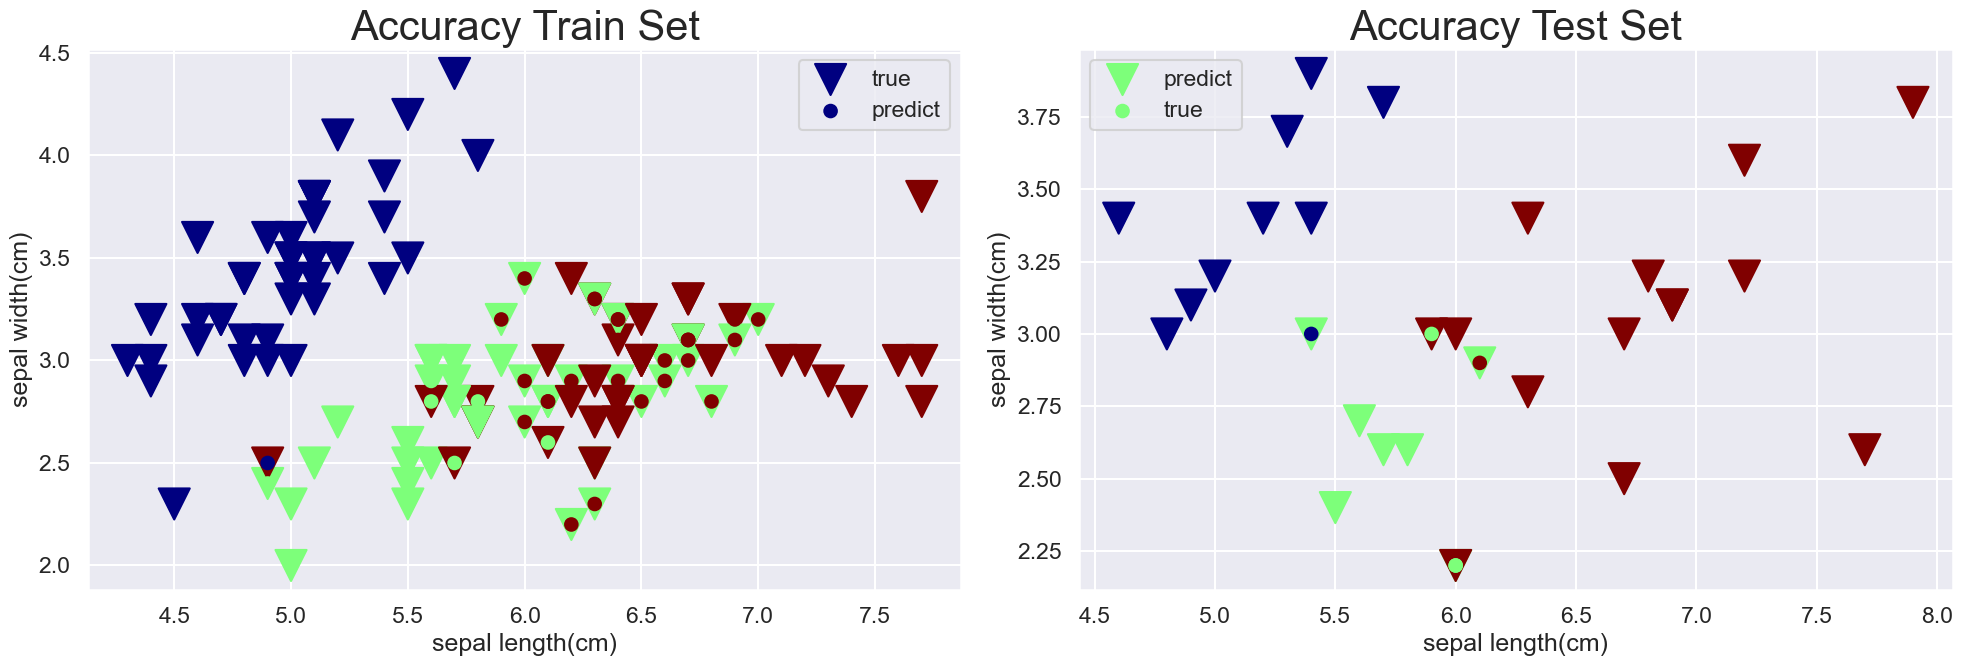

In [6]:

fig, axs  = plt.subplots(1,2,   figsize = (20,7))
axs[0].scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'],
                          c = y_train,marker = 'v',s = 500, cmap='jet', label = 'true')
axs[0].scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'],
                        c = y_predict_train, marker = 'o', cmap='jet',  label = 'predict')
axs[0].set_title('Accuracy Train Set', fontsize = 30)
axs[0].set_xlabel('sepal length(cm)')
axs[0].set_ylabel('sepal width(cm)')
axs[0].legend()
axs[1].scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'],
                          c = y_test,marker = 'v', s = 500, label = 'predict', cmap='jet')
axs[1].scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'],
                        c = y_predict_test,marker = 'o', cmap='jet',  label = 'true')
axs[1].set_title('Accuracy Test Set', fontsize = 30)
axs[1].set_xlabel('sepal length(cm)')
axs[1].set_ylabel('sepal width(cm)')
axs[1].legend()
fig.tight_layout()


Then we compare the mean accuracy of the train and test set.

In [7]:
train_score = metrics.accuracy_score(y_train, y_predict_train) #knn.score(y_train,y_predict_train)
test_score = metrics.accuracy_score(y_test, y_predict_test) #knn.score(y_test, y_predict_test)

# how don't they have the same shape??
print(('The mean accuracy of train model is {} and the one of the test model {}')
      .format(round(train_score,3), round(test_score,3)))

The mean accuracy of train model is 0.75 and the one of the test model 0.867


---
### Decision boundaries
If we want to be fancy (we do), we can also plot the decision boundaries like so:

C:\Users\paesc\anaconda3\envs\py311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


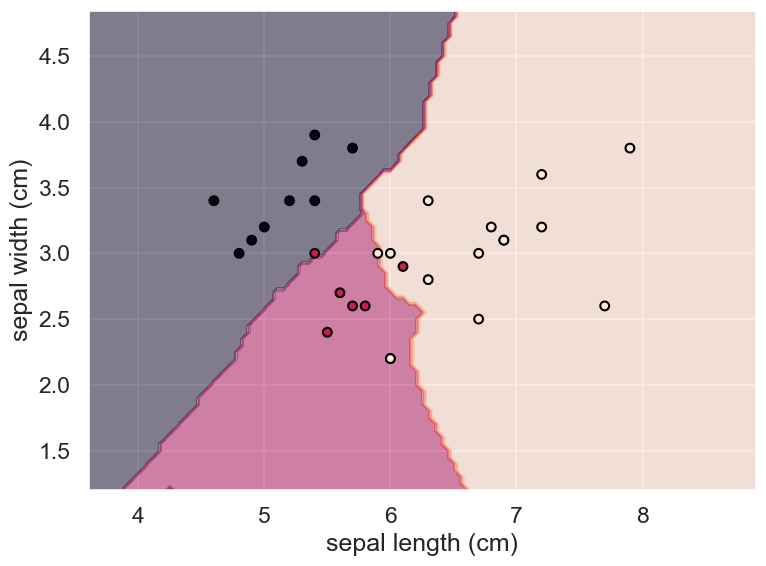

In [8]:
X, y = np.asarray(X_test), np.asarray(y_test)

# draw decision boundaries as coloured regions
h = .05
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.contourf(xx, yy, Z, alpha=.5)

# scatter plot of the actual classes
ax.scatter(X[:,0], X[:,1], c=y, edgecolor='k', s=40)
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
fig.tight_layout()

---
The KNN algorithm requires a free parameter, namely the number of neighbors $k$. We try to find the optimal choice for the number of neighbors.

First, we compute both the training and test accuracy of different KNN classifiers specifying different  numbers of neighbours from $k=1$ to $k=20$.

In [9]:
def opt_neigh(X,y):
    X = np.array(X)
    y = np.array(y)
    accuracy = np.zeros(20)
    for k in range(1,21):
        knn = neighbors.KNeighborsClassifier(n_neighbors=k)
        fit = knn.fit(X,y)
        prediction = fit.predict(X)
        accuracy[k-1] = metrics.accuracy_score(y, prediction)
    return accuracy

accuracy_train = opt_neigh(X_train, y_train)
accuracy_test = opt_neigh(X_test, y_test)
        
#print(('The accuracy of the train set is {} and of the test set it is {}')
     # .format(accuracy_train, accuracy_test))

Then, we plot both the training and test accuracy as a function of the number of neighbours

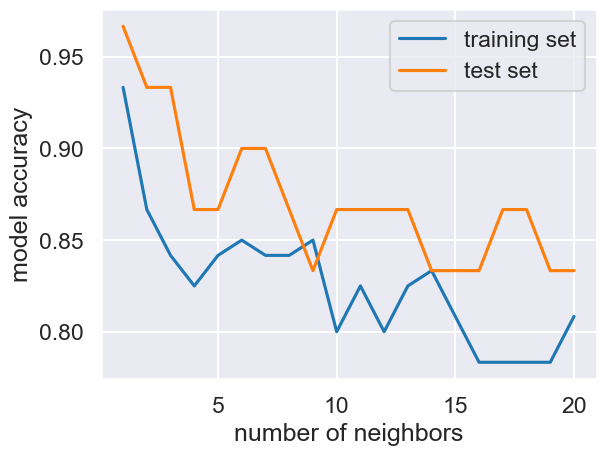

In [10]:
plt.plot(np.array([i+1 for i in range(len(accuracy_train))]), accuracy_train
        , label = 'training set')
plt.plot(np.array([j+1 for j in range(len(accuracy_test))]), accuracy_test
        , label = 'test set')
plt.xlabel('number of neighbors')
plt.ylabel('model accuracy')
plt.legend()

### Conclusion:
An increasing k number of neighbors shows the trend of decreasing the models accuracy. With increasing k the decision boundaries get smoother compared to lower k's. The flexibility of the model is tightly correlated with the k value. The trade off persists in the following: with higher k's we get higher bias and lower variance whereas with lower k's the bias decrease and the variance increases.


---
## Support Vector Machines

Support Vector machines (SVMs) are supervised learning methods that can be used for classification, regression and outliers detection. A major advantage of SVMs is that they can be very effective in high-dimensional spaces. SVM work by constructing a hyper-plane or a set of hyper-planes in a high (or infinite) dimensional space that can be used for these tasks. The general idea behind SVMs is that a good separation is achieved by the hyper-plane if it has the largest possible distance to the nearest training data points.


We're going to repeat the classification task from above, but this time we're going to use a support vector classification algorithm.

---

To facilitate plotting decision boundaries we implement a function to do so.

In [32]:
def decision_boundary(X, y, classifier, ax):
    """ Plots decision boundaries given input features
    X, input target y and a classifier.

    Args:
        X: features
        y: target
        classifier: sklearn KNeighborsClassifier or SVC object (fitted to data!)
    """
    if not isinstance(X, np.ndarray):
        X = np.asarray(X)
    if not (isinstance(classifier, svm._classes.SVC)
            or isinstance(classifier, neighbors._classification.KNeighborsClassifier)):
        print('classifier needs to be a SVC or KNN object')
        return

    # implement a meshgrid of detected points
    h = 0.05
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the mesh
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y,
               edgecolor='k', s=30)
    # compute mean accuracy
    acc = classifier.score(X, y)
    # print(f'mean accuracy: {classifier.score(X, y):.2f}', flush=True)
    ax.set_title(f"{type(classifier).__name__} fit with mean accuracy of {acc:.2f}")

    return acc


First, we use the SVM classifier *svm.SVC* to predict the flower species by using the same two features as before. This time, we use all data, without splitting them into train/test sets. We fit your model to the data and provide the model score.

In [33]:
X = df[['sepal length (cm)', 'sepal width (cm)']]
y = df['species']

svc = svm.SVC()
fit = svc.fit(X,y)
prediction = fit.predict(X)
accuracy = metrics.accuracy_score(y, prediction)
print(('The mean accuracy is {}.').format(accuracy))

The mean accuracy is 0.82.


Next, we se the pre-defined function from below and create decision boundary plots with the KNN and SVC algorithms and compare the results visually as well as their respective model scores. We have to initiate and fit the classifier object before you can hand it to the function!

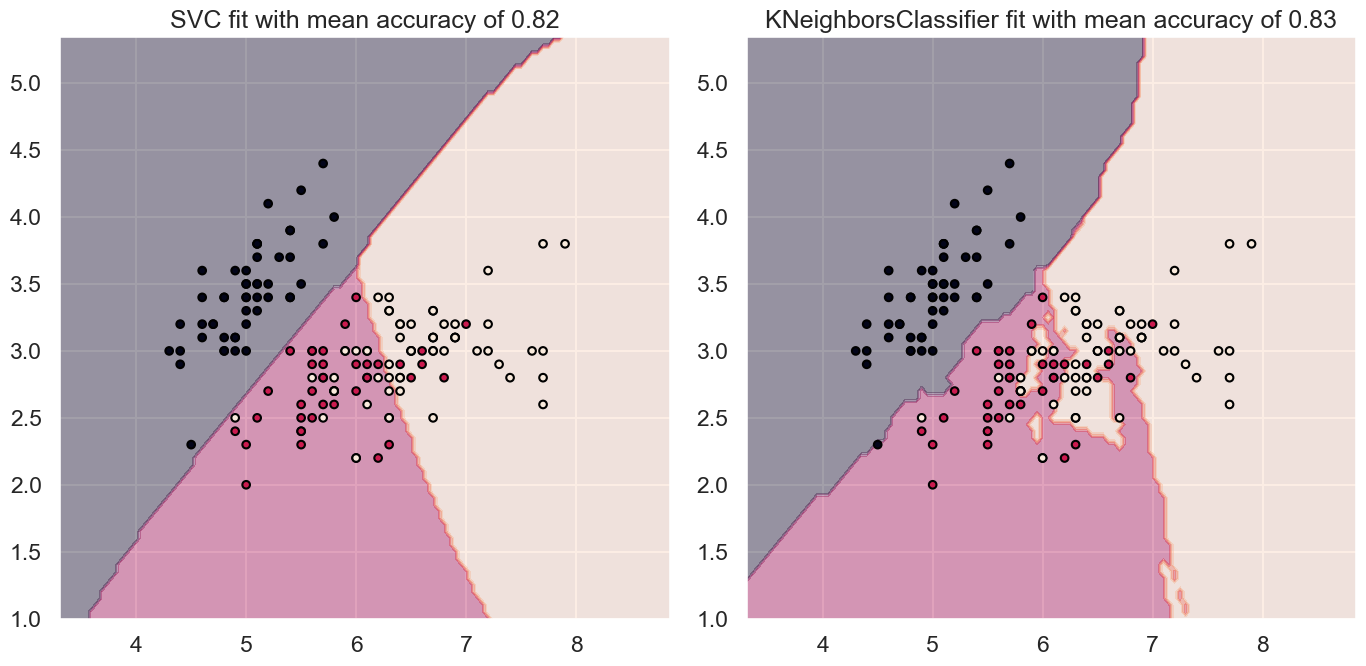

In [34]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning, message="X does not have valid feature names")
    knn = neighbors.KNeighborsClassifier()
    fit_knn = knn.fit(X,y)
    fit_svm = svc.fit(X,y)

    fig, axs = plt.subplots(1, 2, figsize = (14, 7))
    for i, fit in enumerate([fit_svm, fit_knn]):
        decision_boundary(X, y, fit, ax = axs[i])

plt.tight_layout()

Finally, let's try different kernels in the SVM (linear, poly, rbf, and sigmoid), and plot the decision boundaries and evaluate the model scores.

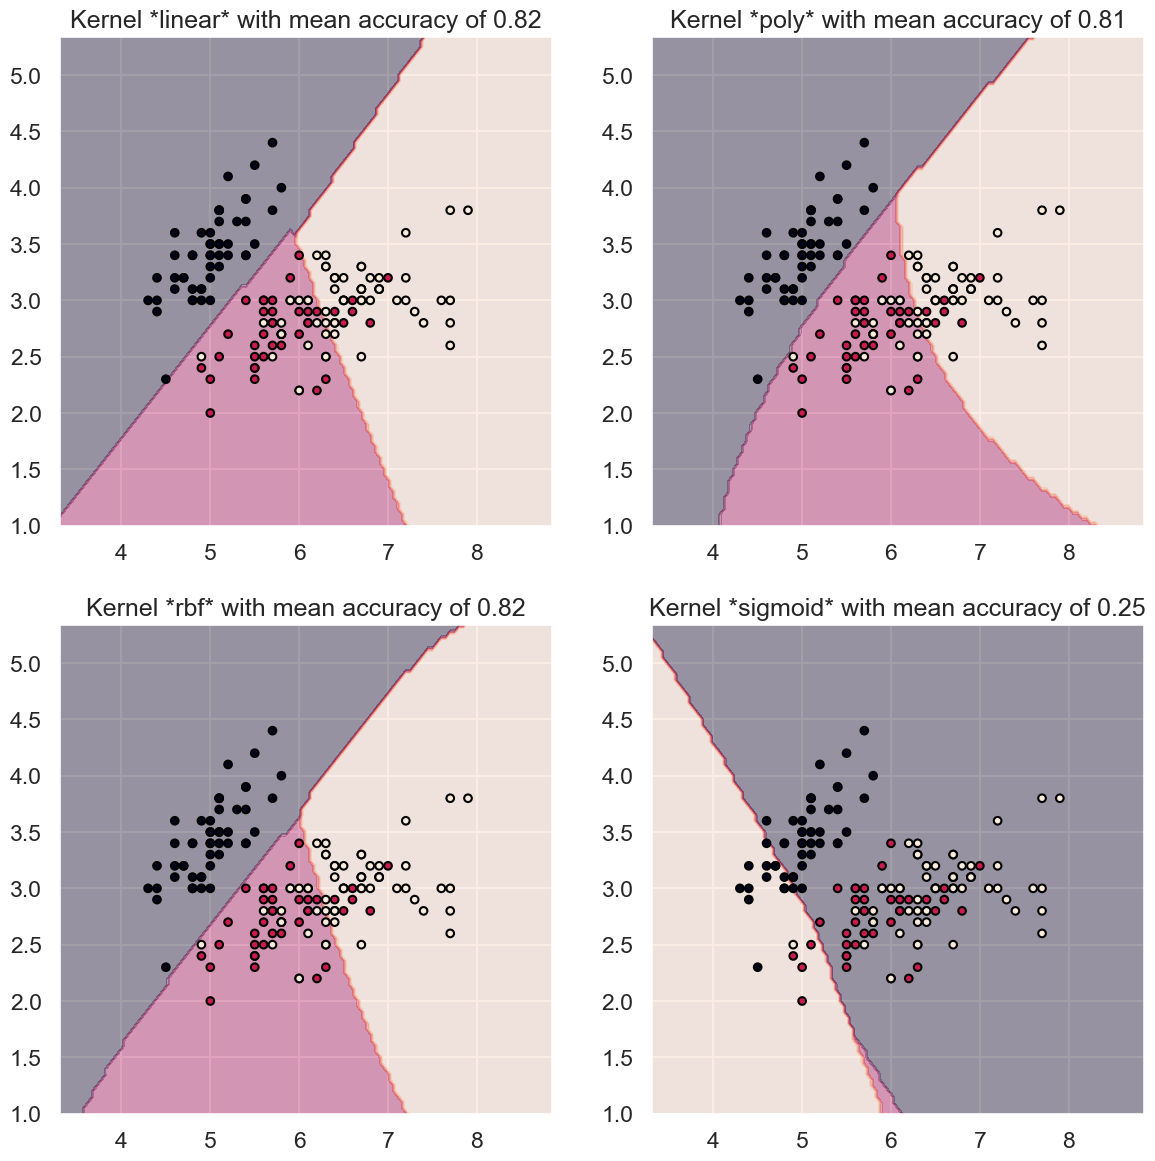

In [39]:
# from sklearn import svm
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning, message="X does not have valid feature names")
    # actual code
    X = df[['sepal length (cm)', 'sepal width (cm)']]
    y = df['species']
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    ker_scores = np.zeros(len(kernels))

    fig, axs = plt.subplots(2, 2, figsize = (14, 14))
    axs = axs.ravel()
    for i in range(len(kernels)):
        svc = svm.SVC(kernel = kernels[i])
        fit = svc.fit(X,y)
        prediction = fit.predict(X)
        # print(('The kernel `{}` delievers the following fit:').format(kernels[i]))
        acc = decision_boundary(X,y,fit, ax = axs[i])
        axs[i].set_title(f"Kernel *{kernels[i]}* with mean accuracy of {acc:.2f}")
        ker_scores[i] = metrics.accuracy_score(y, prediction)



We compare the kernel accuracies in a bar plot to conclude that sigmoid performs the worst:

Text(0.5, 1.0, 'Kernel accuracies')

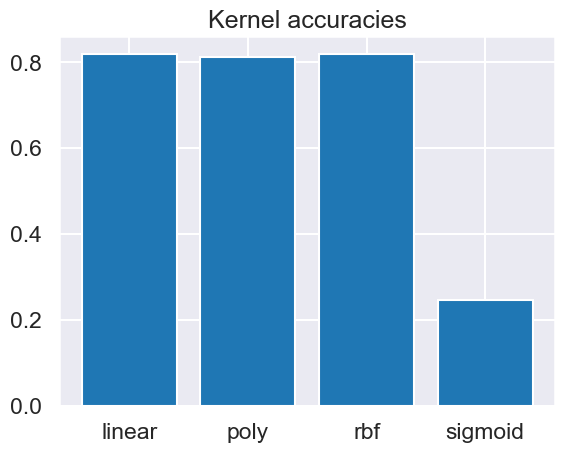

In [40]:
# bar plot
plt.bar(kernels, ker_scores)
plt.title('Kernel accuracies')